In [ ]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 4.7 MB/s 
     |████████████████████████████████| 604 kB 25.9 MB/s 
     |████████████████████████████████| 120 kB 50.3 MB/s 
     |████████████████████████████████| 47.6 MB 2.8 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.6.0.66
    Uninstalling opencv-python-headless-4.6.0.66:
      Successfully uninstalled opencv-python-headless-4.6.0.66


In [ ]:
cd ./drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
import cv2
import re
import pandas as pd
import numpy as np
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
from google.colab.patches import cv2_imshow
import easyocr

In [ ]:
blocklist = '!"#$%&\'()*+,-./0123456789:;<=>?@[\\]^_`{|}~ㆍabcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ\n'
# dataset = pd.read_csv('test.csv')[256:269]
dataset = pd.read_csv('test.csv')
reader = easyocr.Reader(['ko'])
img_size = 50

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

In [ ]:
def pre_processing(img):
  img = cv2.medianBlur(img, 5)
  horizontal = True
  if img.shape[1] > img.shape[0]:
    img = cv2.resize(img, dsize=(0, 0), fx=img_size/img.shape[0], fy=img_size/img.shape[0], interpolation=cv2.INTER_AREA)
  else:
    horizontal = False
    img = cv2.resize(img, dsize=(0, 0), fx=img_size/img.shape[1], fy=img_size/img.shape[1] * 2.5, interpolation=cv2.INTER_AREA)
  
  return img, horizontal

In [ ]:
def post_processing(text):
  num_blank = text.count(' ')
  if num_blank * 2 + 1 == len(text):
    text = text.replace(' ', '')
  return text

In [ ]:
def recognize(src, reader, blocklist, horizontal):
  # cv2_imshow(src)
  results = []

  for img in [src] + list(cv2.split(src)):
    if horizontal:
      result = reader.readtext(img, blocklist=blocklist, batch_size=256)
    else:
      result = reader.readtext(img, blocklist=blocklist, batch_size=256, link_threshold=1, ycenter_ths=0)
    total_confidence = 0
    total_area = 0
    merged_text = []

    last_pos = 0
    for pos, text, confidence in sorted(result, key=lambda x: x[0][0][0 if horizontal else 1]):
      (tl, tr, br, bl) = pos
      tl = (int(tl[0]), int(tl[1]))
      br = (int(br[0]), int(br[1]))
      if horizontal:
        if tl[0] < last_pos:
          break
        else:
          last_pos = br[0]
      # else:
      #   if tl[1] < last_pos:
      #     break
      #   else:
      #     last_pos = br[1]
      img = cv2.rectangle(img, tuple(map(int, tl)), tuple(map(int, br)), (0, 0, 0), 2)

      print(f'text : {text}, score : {confidence}')
      merged_text.append(text)
      total_confidence += confidence
      total_area += abs(tl[0] - br[0]) * abs(tl[1] - br[0])
    else:
      merged_text = ' '.join(merged_text)
      mean_confidence = total_confidence / len(result) if len(result) != 0 else 0
      
      results.append((mean_confidence * total_area, merged_text))
    cv2_imshow(img)

  # results.sort(key=lambda x: (x[0] >= 0.99, len(x[1].replace(' ', '')), x[0]))
  results.sort()
  result_text = results[-1][1] if results else ''
  print(f'final result : {result_text}')
  return result_text

In [ ]:
# boxes = reader.detect(img)
# text = ''
# for coords in boxes[0][0]:
#   x_min, x_max, y_min, y_max = map(lambda x: max(0, x), coords)
#   img = source[y_min:y_max, x_min:x_max]
#   cv2_imshow(img)

  0%|          | 0/3669 [00:00<?, ?it/s]

---------- case #0 ----------
text : 도교, score : 0.07514397740765276


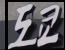

text : 도교, score : 0.09227492651533997


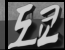

text : 도교, score : 0.06829850097559054


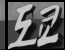

text : 도교, score : 0.07922446558936526


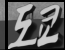

final result : 도교
---------- case #1 ----------
text : 규카스, score : 0.6642037699475191


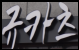

text : 규카스, score : 0.7259617398290967


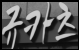

text : 규카스, score : 0.6747139866376017


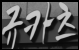

text : 규카스, score : 0.6759150341294462


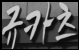

final result : 규카스
---------- case #2 ----------
text : 어온, score : 0.005661113457910224


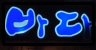

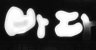

text : 따, score : 0.014826224151054446


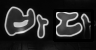

text : 따, score : 0.11301885693811542


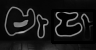

final result : 따
---------- case #3 ----------
text : 미경, score : 0.059783936154041636


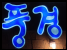

text : 증거, score : 0.08171634067936824


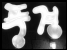

text : 용경, score : 0.08321813369699167


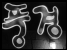

text : 촬경, score : 0.12765947780557585


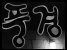

final result : 촬경
---------- case #4 ----------
text : 덕천중학 교, score : 0.625181937400106


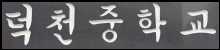

text : 덕천중학 교, score : 0.6319384509117575


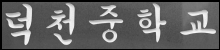

text : 덕천중학 교, score : 0.6290979058638455


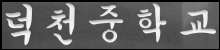

text : 덕천중학 교, score : 0.598547696651306


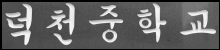

final result : 덕천중학 교
---------- case #5 ----------
text : 로덤노인요양원, score : 0.30795654683228907


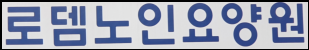

text : 로자노인요양원, score : 0.30031937500685435


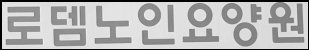

text : 로덤노인요양원, score : 0.30705913051587763


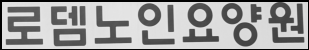

text : 로덤노인요양원, score : 0.2967143860395848


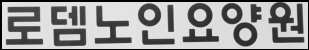

final result : 로덤노인요양원
---------- case #6 ----------
text : 한우리 건축사사무소, score : 0.9960045461583477


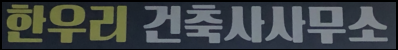

text : 한문리 건축사사무소, score : 0.7890328771033304


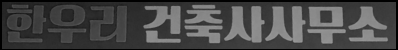

text : 한우리 건축사사무소, score : 0.9972594745352971


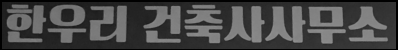

text : 한우리 건축사사무소, score : 0.9895897356658314


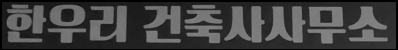

final result : 한우리 건축사사무소
---------- case #7 ----------
text : 배프시계, score : 0.17601178586483002


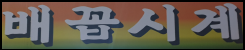

text : 배 꿈시계, score : 0.3333535004427837


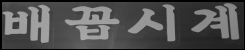

text : 배쓸시계, score : 0.1370808333158493


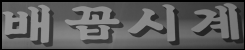

text : 배 꿈시체, score : 0.019230003934398544


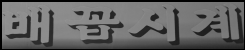

final result : 배 꿈시계
---------- case #8 ----------
text : 의원, score : 0.8831251743472396


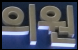

text : 의원, score : 0.9406029358071663


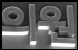

text : 의원, score : 0.6356403617652275


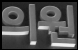

text : 의원, score : 0.9999936779785765


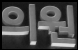

final result : 의원
---------- case #9 ----------
text : 소주, score : 0.9999880303160049


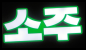

text : 소주, score : 0.9999847428749291


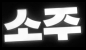

text : 소주, score : 0.999996375372952


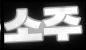

text : 소주, score : 0.9999296997804626


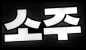

final result : 소주
---------- case #10 ----------
text : 신선육 국내산, score : 0.9923513202912083


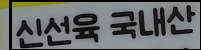

text : 신선육 국내산, score : 0.990838931093638


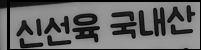

text : 신선육 국내산, score : 0.987310289660752


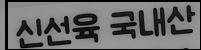

text : 신선육 국내산, score : 0.9866098041501018


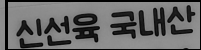

final result : 신선육 국내산
---------- case #11 ----------
text : 피엔라벤 진주접, score : 0.4446710048386832


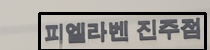

text : 피엔라벤 진주접, score : 0.5106198583550451


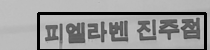

text : 피엔라벤 진주접, score : 0.5379915265551499


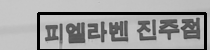

text : 피엔라벤 진주접, score : 0.44171313846299626


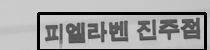

final result : 피엔라벤 진주접
---------- case #12 ----------
text : 수족관, score : 0.5982279239526292


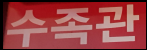

text : 수족관, score : 0.53379859636202


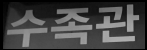

text : 수족관, score : 0.6056969861315459


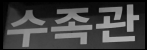

text : 수속관, score : 0.15135486775773122


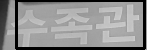

final result : 수족관
---------- case #13 ----------


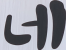

text : 네, score : 0.99884853150526


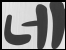

text : 네, score : 0.9989183491384779


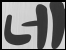

text : 네, score : 0.9989517099612044


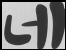

final result : 네
---------- case #14 ----------
text : 꼬, score : 0.41578972529356406


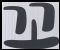

text : 꼬, score : 0.40112763554319386


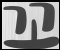

text : 꼬, score : 0.36088212101867967


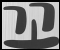

text : 꼬, score : 0.5445480739930453


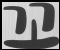

final result : 꼬
---------- case #15 ----------
text : 성원유리가공사, score : 0.7783667266249601


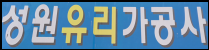

text : 틱활유리다 사, score : 0.010991324069538441


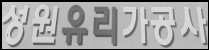

text : 성원유리가공사, score : 0.6854898154163859


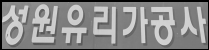

text : 성원유리가공사, score : 0.6415507994566024


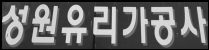

final result : 성원유리가공사
---------- case #16 ----------
text : 다정, score : 0.9999648497092857


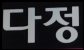

text : 다정, score : 0.999965945516241


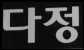

text : 다정, score : 0.9999651868806191


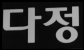

text : 다정, score : 0.9999633324386976


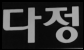

final result : 다정
---------- case #17 ----------
text : 미용실, score : 0.9998301405608201


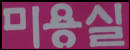

text : 미용실, score : 0.9998574637186085


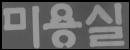

text : 미용실, score : 0.9997532646057047


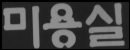

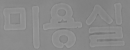

final result : 미용실
---------- case #18 ----------
text : 왕배화로, score : 0.08207836747169495


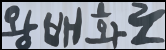

text : 왕배화로, score : 0.07430630177259445


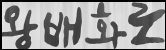

text : 왕배화로, score : 0.06799393892288208


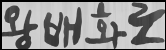

text : 왕배화로, score : 0.09157486259937286


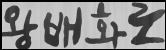

final result : 왕배화로
---------- case #19 ----------
text : 시카고 뿐, score : 0.4401034528708798


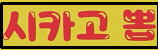

text : 실 들 , score : 0.008553329718409499


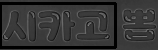

text : 시카고 뽑, score : 0.23299309053239084


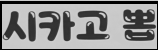

text : 면 흘아 모 , score : 0.0011593722768851184


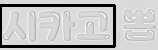

final result : 시카고 뿐
---------- case #20 ----------
text : 여관, score : 0.9968191438154994


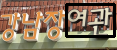

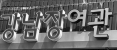

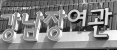

text : 공장여, score : 0.10052318508580285


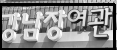

final result : 여관
---------- case #21 ----------
text : 제 민 내, score : 0.5130996234772189


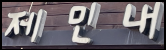

text : 제 맨 내, score : 0.5682264241284982


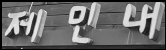

text : 제 민 내, score : 0.751845003721036


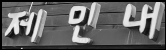

text : 체 민 내, score : 0.26909534710533595


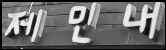

final result : 제 민 내
---------- case #22 ----------
text : 래 쉬 에 이, score : 0.6825241265177004


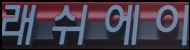

text : 래 쉬 에 이, score : 0.7924837980513021


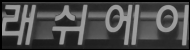

text : 래 쉬 에 이, score : 0.6150983201020559


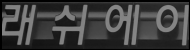

text : 태 쥐 에 이, score : 0.4553154412993981


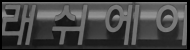

final result : 래 쉬 에 이
---------- case #23 ----------
text : 분티아카 데디, score : 0.05849165822772448


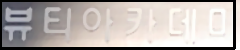

text : 분티아 키 데디, score : 0.13689126621784864


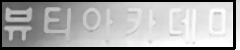

text : 분티이가다, score : 0.1674238952371124


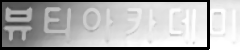

text : 분티이가다, score : 0.24929849221841321


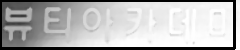

final result : 분티이가다
---------- case #24 ----------
text : 올리데이, score : 0.48379749059677124


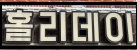

text : 올리데이, score : 0.16890136897563934


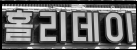

text : 올리데이, score : 0.34630534052848816


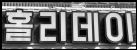

text : 올리데이, score : 0.4981301724910736


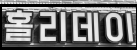

final result : 올리데이
---------- case #25 ----------
text : 실사현수막, score : 0.989976725624354


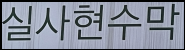

text : 실사현수막, score : 0.9893878136752622


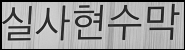

text : 실사현수막, score : 0.9900912151696566


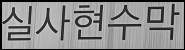

text : 실사현수막, score : 0.9897389346516431


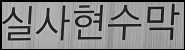

final result : 실사현수막
---------- case #26 ----------
text : 유 객 주, score : 0.45853779737223305


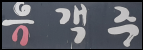

text : 유 객 주, score : 0.6593235375964265


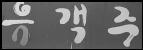

text : 유 객 주, score : 0.4714848351517047


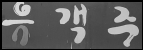

text : 유 객 주, score : 0.41996960116449955


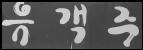

final result : 유 객 주
---------- case #27 ----------
text : 식당가, score : 0.9996754259271826


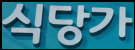

text : 식당가, score : 0.6524127721786499


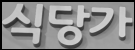

text : 식당가, score : 0.9997761845588684


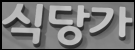

text : 식당가, score : 0.9998529213227234


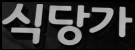

final result : 식당가
---------- case #28 ----------
text : 편의시설, score : 0.9997668266296387


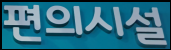

text : 편의시설, score : 0.9682869813035427


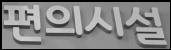

text : 편의시설, score : 0.9994021058082581


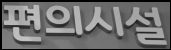

text : 편의시설, score : 0.9997727274894714


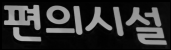

final result : 편의시설
---------- case #29 ----------


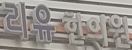

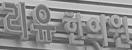

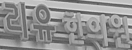

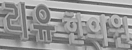

final result : 
---------- case #30 ----------
text : 체형관리, score : 0.9393710494041443


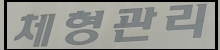

text : 체형관리, score : 0.8800586462020874


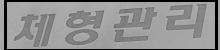

text : 체형관리, score : 0.9333102703094482


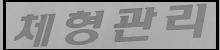

text : 체형관리, score : 0.9382776021957397


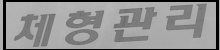

final result : 체형관리
---------- case #31 ----------
text : 세아타워, score : 0.6355849290020509


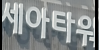

text : 세아타워, score : 0.6990237832069397


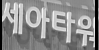

text : 세아타워, score : 0.7211287021636963


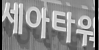

text : 세아타워, score : 0.7031783626351678


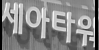

final result : 세아타워
---------- case #32 ----------
text : 체코 흑생맥주 전문점, score : 0.6854169592593575


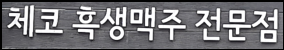

text : 체코 흑생맥주 전문점, score : 0.6974821087028724


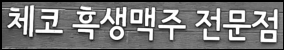

text : 체코 흑생맥주 전문점, score : 0.6802473185211598


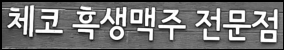

text : 체코 흑생맥주 전문점, score : 0.6852938207506778


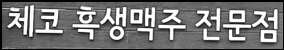

final result : 체코 흑생맥주 전문점
---------- case #33 ----------
text : 로이견원, score : 0.011635600589215755


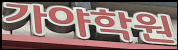

text : 꽉이함원, score : 0.030971240252256393


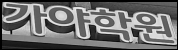

text : 꽉이함원, score : 0.0306867603212595


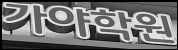

text : 귀이관원, score : 0.015402860939502716


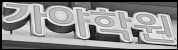

final result : 꽉이함원
---------- case #34 ----------
text : 테 크 노스, score : 0.163528106946974


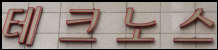

text : 테 크 노스, score : 0.20976170936233143


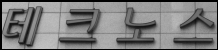

text : 테 크 노스, score : 0.31749969274555107


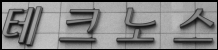

text : 퇴 크 노스, score : 0.18633389309981735


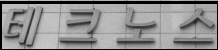

final result : 테 크 노스
---------- case #35 ----------
text : 뉴 캐 슬 호 텔, score : 0.6376923463854932


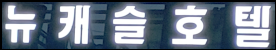

text : 뉴 개 슬 호 텔, score : 0.3421334981412472


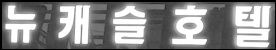

text : 뉴 캐 슬 호 텔, score : 0.6545508869989225


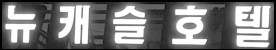

text : 뉴 캐 슬 호 텔, score : 0.6185560396583795


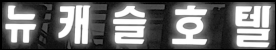

final result : 뉴 캐 슬 호 텔
---------- case #36 ----------
text : 공 감, score : 0.9878068285977941


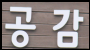

text : 공 감, score : 0.9988721038821332


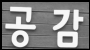

text : 공 감, score : 0.9965535331321271


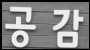

text : 공감, score : 0.9999706659194536


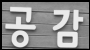

final result : 공감
---------- case #37 ----------
text : 집밥, score : 0.1370200463780753


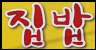

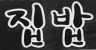

text : 집밥, score : 0.8386128714694759


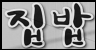

text : 것, score : 0.03706247875040791


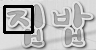

final result : 집밥
---------- case #38 ----------
text : 포, score : 0.5538283927358556


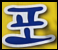

text : 표, score : 0.17133792060764907


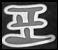

text : 포, score : 0.20985475537972675


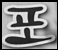

text : 표, score : 0.8900442071257295


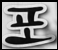

final result : 표
---------- case #39 ----------
text : 차, score : 0.6975435277589703


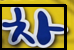

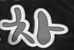

text : 차, score : 0.6999315832686648


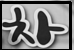

text : 차, score : 0.9864733616268495


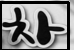

final result : 차
---------- case #40 ----------
text : 권 즈혜 어, score : 0.41174581465111804


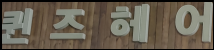

text : 권 즈혜 어, score : 0.40524290254426143


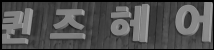

text : 권 즈혜 어, score : 0.6912036870051282


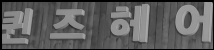

text : 권 즈 헤 어, score : 0.3070811566480267


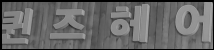

final result : 권 즈혜 어
---------- case #41 ----------
text : 장반 불와문트, score : 0.0011442678885593821


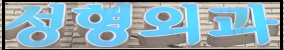

text :  하의과, score : 0.21666263299852606


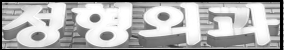

text : 총장 양어꽤, score : 0.005372454402645592


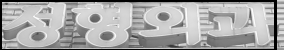

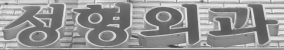

final result :  하의과
---------- case #42 ----------


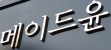

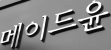

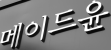

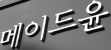

final result : 
---------- case #43 ----------
text : 뼈다귀량, score : 0.46911218762397766


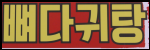

text : 때다귀림, score : 0.15918822586536407


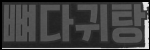

text : 뼈다귀랑, score : 0.5270766019821167


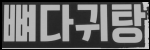

text : 떼마있량, score : 0.016468238085508347


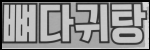

final result : 뼈다귀랑
---------- case #44 ----------
text : 배사, score : 0.9999456309983256


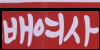

text : 배사, score : 0.9999323128322639


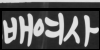

text : 배사, score : 0.9999595392651772


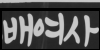

text : 배사, score : 0.9991596952858691


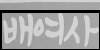

final result : 배사
---------- case #45 ----------
text : 물리 분식, score : 0.6551772230397976


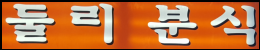

text : 둘리 분식, score : 0.9277090933863644


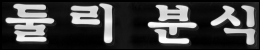

text : 둘리 분식, score : 0.9039390561506301


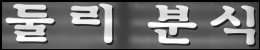

text : 물질 분스, score : 0.034619077883172776


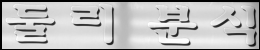

final result : 둘리 분식
---------- case #46 ----------
text : 킬훈다 이온스클럽, score : 0.015961447152590586


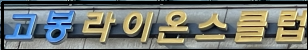

text : 꾸중, score : 0.18803114713943775


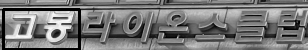

text : 무훈다 이온스클럽, score : 0.0387366911057665


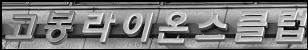

text : 무통다 이온스클럽, score : 0.09267472051948836


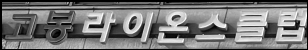

final result : 무통다 이온스클럽
---------- case #47 ----------
text : 먹이라, score : 0.7968914554958662


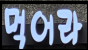

text : 먹이라, score : 0.8076967536441283


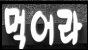

text : 먹이라, score : 0.7784055003132162


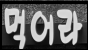

text : 먹이라, score : 0.7577374358874258


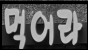

final result : 먹이라
---------- case #48 ----------
text : 구위라, score : 0.19214843491592223


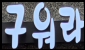

text : 구위라, score : 0.23187861916499242


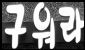

text : 구위라, score : 0.11370008438825607


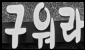

text : 구위다, score : 0.16983904965378252


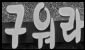

final result : 구위라
---------- case #49 ----------
text : 심성용기다  , score : 0.011392245826850661


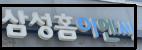

text : 심성용이 , score : 0.104504076000009


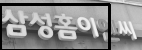

text : 심성용이, score : 0.5124011635780334


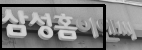

text : 심성용이언, score : 0.4095868720007113


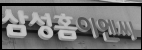

final result : 심성용이언
---------- case #50 ----------
text : 공인중개사, score : 0.8558814108877313


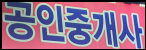

text : 공인중  , score : 0.12401228672045639


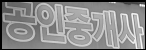

text : 공인중해자, score : 0.09793794114439835


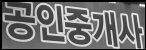

text : 공인중개사, score : 0.9973538177442877


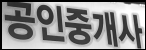

final result : 공인중개사
---------- case #51 ----------
text : 사무소, score : 0.7314287140244543


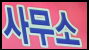

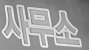

text : 물문산, score : 0.05502922272282727


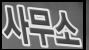

text : 사무소, score : 0.9999681115150452


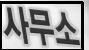

final result : 사무소
---------- case #52 ----------
text : 효도마을 요양원, score : 0.9242524778900333


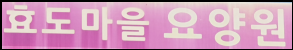

text : 효도마을, score : 0.1936509758234024
text : 안야 뭐, score : 0.02894424833357334


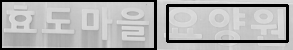

text : 효도마을 요양원, score : 0.9856350269929542


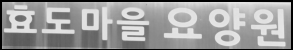

text : 도다 들, score : 0.3535665642595612
text :  , score : 0.4985579017445113


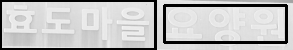

final result : 효도마을 요양원
---------- case #53 ----------
text : 프라임 리방텔, score : 0.4367858680954736


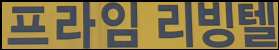

text : 뜨리액 미행택, score : 0.0362684120252325


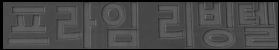

text : 프라임 리방텔, score : 0.5729409503124362


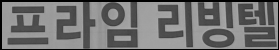

text : 프라임 리방텔, score : 0.5198230598629544


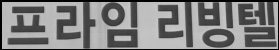

final result : 프라임 리방텔
---------- case #54 ----------
text : 실프사진관, score : 0.9101307359656904


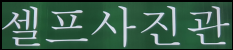

text : 실프사진관, score : 0.9061753077152596


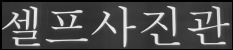

text : 실프사진관, score : 0.9233530229316805


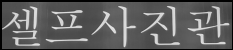

text : 실프사진관, score : 0.8813635062746181


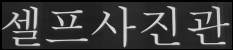

final result : 실프사진관
---------- case #55 ----------
text : 국, score : 0.9999038004170338
text : 게, score : 0.06381528923520818


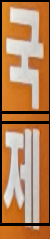

text : 국, score : 0.9999541049501239
text : 세, score : 0.009249249432984108


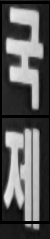

text : 국, score : 0.9998891384334598
text : 체, score : 0.0644079679208156


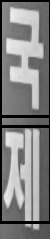

text : 개, score : 0.8944729358208612


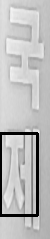

final result : 개
---------- case #56 ----------
text : 제과제망, score : 0.1523149609565735


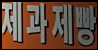

text : 제과제빵, score : 0.6508816480636597


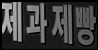

text : 제과제빵, score : 0.42164841294288635


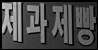

text : 세계계방, score : 0.056211862713098526


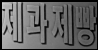

final result : 제과제빵
---------- case #57 ----------
text : 의, score : 0.17628617797757684
text : 인, score : 0.1486598044771803


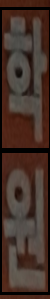

text : 익, score : 0.10398575367588947
text : 민, score : 0.019935001080298775


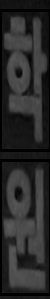

text : 의, score : 0.17866595777582006
text : 원, score : 0.5565752169472695


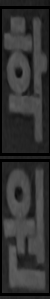

text : 깔, score : 0.0019033961838067631
text : 이, score : 0.003770922112367181


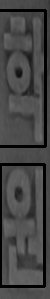

final result : 의 원
---------- case #58 ----------
text : 수원가 정법원, score : 0.5334107459385642


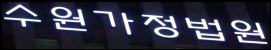

text : 수원가 정법원, score : 0.8452325438764077


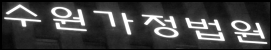

text : 수원가 정법원, score : 0.49762386406326914


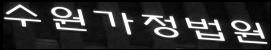

text : 수원가 정법원, score : 0.7236468355872878


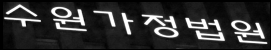

final result : 수원가 정법원
---------- case #59 ----------


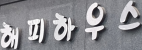

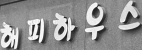

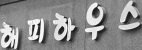

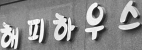

final result : 
---------- case #60 ----------
text : 신우임에스, score : 0.4497248259333707


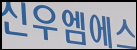

text : 신우임에스, score : 0.3802567723992793


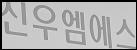

text : 신우임에스, score : 0.4488462076814143


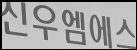

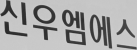

final result : 신우임에스
---------- case #61 ----------
text : 부부 한 의원, score : 0.608948113452982


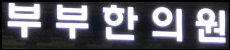

text : 부부 한 의원, score : 0.8123455384348638


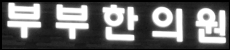

text : 부부 한 의원, score : 0.5700362853243239


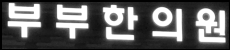

text : 부부 한 의원, score : 0.5631141311196736


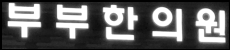

final result : 부부 한 의원
---------- case #62 ----------
text : 네일하오, score : 0.6943755745887756


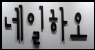

text : 네일하오, score : 0.7282349467277527


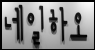

text : 네인하오, score : 0.43293246626853943


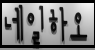

text : 네일하오, score : 0.7059123516082764


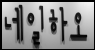

final result : 네일하오
---------- case #63 ----------
text : 페인트, score : 0.4595425432951867


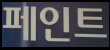

text : 폐인트, score : 0.7424690139559512


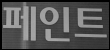

text : 페인트, score : 0.4611812333081115


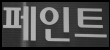

text : 페인트, score : 0.4695715662249501


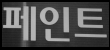

final result : 폐인트
---------- case #64 ----------
text : 머리, score : 0.5561389548414775


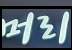

text : 머리, score : 0.7789798444133764


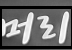

text : 머리, score : 0.9460088782845294


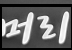

text : 머리, score : 0.5572044408794314


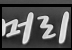

final result : 머리
---------- case #65 ----------
text : 해봄, score : 0.848991376165273


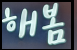

text : 해봄, score : 0.8845866113022356


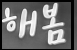

text : 해봄, score : 0.5593755287015381


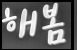

text : 해봄, score : 0.6954530958094722


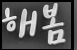

final result : 해봄
---------- case #66 ----------
text : 미래한의원, score : 0.9997616386275954


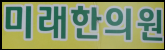

text : 미사사의원, score : 0.011202487821448693


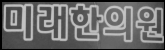

text : 미래한의원, score : 0.9997139762109779


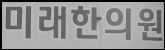

text : 미래한의원, score : 0.9998601614305483


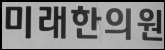

final result : 미래한의원
---------- case #67 ----------
text : 누에보, score : 0.384615957736969


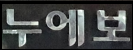

text : 누에보, score : 0.6507259322437277


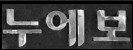

text : 누에보, score : 0.7386543414574767


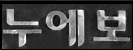

text : 누에보, score : 0.6278125268894522


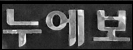

final result : 누에보
---------- case #68 ----------
text : 현대부동산, score : 0.9827913881143575


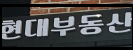

text : 현대부동산, score : 0.9919128032642169


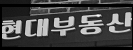

text : 현대부동산, score : 0.9845755772213909


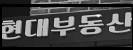

text : 현대부동산, score : 0.8982953073756386


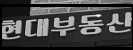

final result : 현대부동산
---------- case #69 ----------


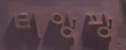

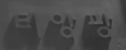

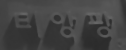

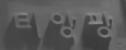

final result : 
---------- case #70 ----------
text : 가 동사 웬비, score : 0.12449437247834812


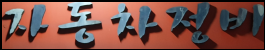

text : 가동사성비, score : 0.6906510335193525


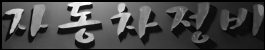

text : 기동사신인, score : 0.09645190548992186


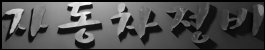

text : 가동사간엔, score : 0.041290067542897976


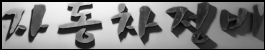

final result : 가동사성비
---------- case #71 ----------
text : 풍경채, score : 0.9977530477634504


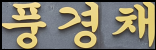

text : 풍경채, score : 0.8819970313839711


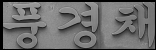

text : 풍경채, score : 0.9976925686106005


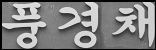

text : 풍경채, score : 0.9985468907652773


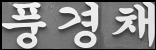

final result : 풍경채
---------- case #72 ----------
text : 인돼리러, score : 0.15186384320259094


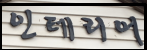

text : 인돼히의, score : 0.02910739555954933


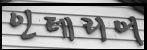

text : 인돼리러, score : 0.14612291753292084


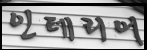

text : 인돼리어, score : 0.44649553298950195


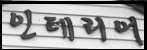

final result : 인돼리어
---------- case #73 ----------
text : 모안독림성, score : 0.020116939471850188


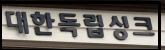

text : 미안독림생, score : 0.2758240155764261


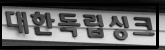

text : 모안독림성문, score : 0.013579650501921517


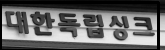

text : 미안독립성로 , score : 0.09624955960989248


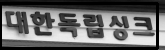

final result : 미안독림생
---------- case #74 ----------
text : 안빛학원, score : 0.9991759657859802


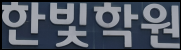

text : 안빛학원, score : 0.9991450309753418


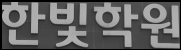

text : 안빛학원, score : 0.9991820454597473


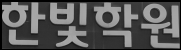

text : 안빛학원, score : 0.9992002248764038


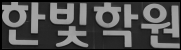

final result : 안빛학원
---------- case #75 ----------
text : 당구, score : 0.9999311327441059


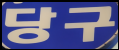

text : 당구, score : 0.8311499219031367


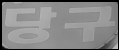

text : 당구, score : 0.9999304584081988


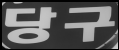

text : 당구, score : 0.9999334086287759


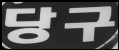

final result : 당구
---------- case #76 ----------
text : 한 양, score : 0.5785220861434937


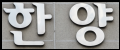

text : 한 양, score : 0.775653600692749


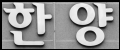

text : 한 양, score : 0.6072283983230591


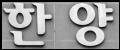

text : 한양, score : 0.6188709111360488


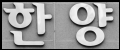

final result : 한 양
---------- case #77 ----------
text : 계란말이, score : 0.9922657012939453


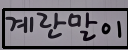

text : 계란말이, score : 0.9918015599250793


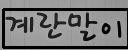

text : 계란말이, score : 0.9923385977745056


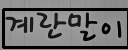

text : 계란말이, score : 0.9920943379402161


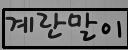

final result : 계란말이
---------- case #78 ----------
text : 스의흐문, score : 0.04578005149960518


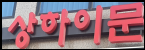

text : 오의의문, score : 0.037266720086336136


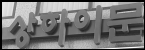

text : 스의화문, score : 0.05753534287214279


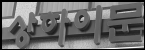

text : 상하어문, score : 0.48255297541618347


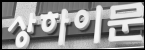

final result : 상하어문
---------- case #79 ----------


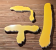

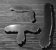

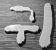

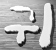

final result : 
---------- case #80 ----------


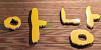

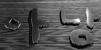

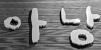

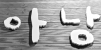

final result : 
---------- case #81 ----------
text : 라짜, score : 0.6478836339777675


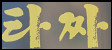

text : 뭣, score : 0.010999345066266264


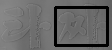

text : 라짜, score : 0.6740051734442584


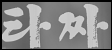

text : 라짜, score : 0.6643142550849785


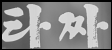

final result : 라짜
---------- case #82 ----------
text : 용인소방서, score : 0.9670276280845286


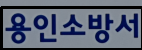

text : 용인소방서, score : 0.9990603769276891


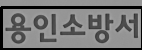

text : 용인소방서, score : 0.8721164289838308


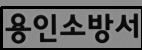

text : 용인소방서, score : 0.9087342266613858


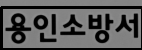

final result : 용인소방서
---------- case #83 ----------
text : 잘생긴, score : 0.9609683156013489


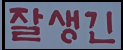

text : 잘생긴, score : 0.9618973135948181


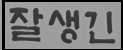

text : 잘생긴, score : 0.8501119017601013


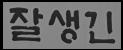

text : 잘생긴, score : 0.18770912102936785


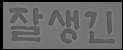

final result : 잘생긴
---------- case #84 ----------
text : 촬영으로, score : 0.5503842364682732


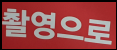

text : 촬영으로, score : 0.9987305998802185


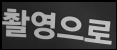

text : 촬영으로, score : 0.9986687302589417


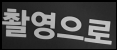

text : 촬영으로, score : 0.954562783241272


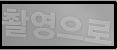

final result : 촬영으로
---------- case #85 ----------
text : 자연치과, score : 0.9956915378570557


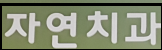

text : 자연치과, score : 0.9969093799591064


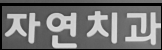

text : 자연치과, score : 0.9956355094909668


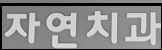

text : 자연치과, score : 0.9962422251701355


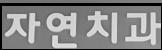

final result : 자연치과
---------- case #86 ----------
text : 국수나무, score : 0.7875884771347046


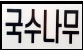

text : 국수나무, score : 0.7534981369972229


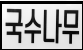

text : 국수나무, score : 0.7664827704429626


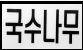

text : 국수나무, score : 0.8310653567314148


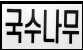

final result : 국수나무
---------- case #87 ----------
text : 홍부물요, score : 0.19195933640003204


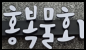

text : 홍부물호, score : 0.3389044404029846


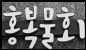

text : 홍부물호, score : 0.3644937574863434


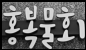

text : 홍부물호, score : 0.33447152376174927


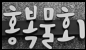

final result : 홍부물호
---------- case #88 ----------
text : 정직한이름, score : 0.9939428654505571


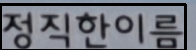

text : 정직한이름, score : 0.994981317598996


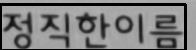

text : 정직한이름, score : 0.9940432700411573


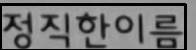

text : 정직한이름, score : 0.99429278253591


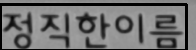

final result : 정직한이름
---------- case #89 ----------
text : 맘모스문구, score : 0.9974882049772824


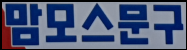

text : 맘모스문구, score : 0.9949593933161047


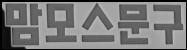

text : 맘모스문구, score : 0.9969682958403805


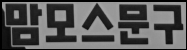

text : 맘모스문구, score : 0.9979343339377938


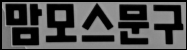

final result : 맘모스문구
---------- case #90 ----------
text : 에어지크, score : 0.34974008798599243


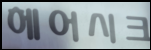

text : 에어지크, score : 0.3361625075340271


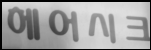

text : 에어지크, score : 0.38586360216140747


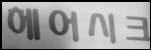

text : 에어지크, score : 0.37936392426490784


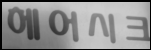

final result : 에어지크
---------- case #91 ----------
text : 전기구이, score : 0.5607640743255615


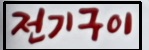

text : 전기구이, score : 0.33795949816703796


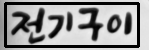

text : 전기구이, score : 0.3655923008918762


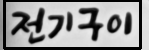

text : 전기구이, score : 0.5296851992607117


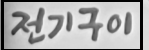

final result : 전기구이
---------- case #92 ----------
text : 한량통, score : 0.8419570574628497


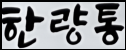

text : 한량통, score : 0.8437275220244593


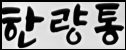

text : 한량통, score : 0.8411193548560699


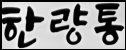

text : 한량통, score : 0.5752403736114502


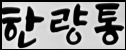

final result : 한량통
---------- case #93 ----------
text : 대, score : 0.13637120385585266


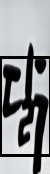

text : 대, score : 0.4103664073677784


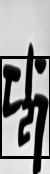

text : 대, score : 0.12268723782551749


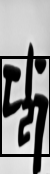

text : 대, score : 0.14433619903692207


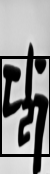

final result : 대
---------- case #94 ----------
text : 보승보송, score : 0.35207054018974304


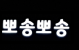

text : 보승보송, score : 0.3072126805782318


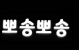

text : 보승보송, score : 0.350246787071228


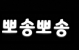

text : 변승변송, score : 0.4998019337654114


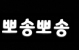

final result : 변승변송
---------- case #95 ----------
text : 하나인력, score : 0.999812126159668


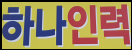

text : 하나인렉, score : 0.06287332624197006


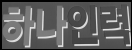

text : 하나인력, score : 0.9998206496238708


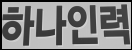

text : 하나인력, score : 0.6172430280091737


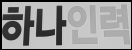

final result : 하나인력
---------- case #96 ----------
text : 달콤생, score : 0.12998431457719078


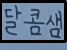

text : 달, score : 0.9981980104379637
text : 코색, score : 0.9540980302107469


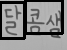

text : 달콤생, score : 0.1315144156288276


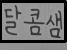

text : 달콤생, score : 0.13774055203154686


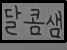

final result : 달콤생
---------- case #97 ----------
text : 독서논술, score : 0.833240270614624


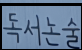

text : 독서논술, score : 0.6802068948745728


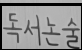

text : 독서논술, score : 0.821803629398346


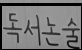

text : 독서논술, score : 0.8771600127220154


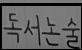

final result : 독서논술
---------- case #98 ----------
text : 슈퍼 올리브영, score : 0.9134328949949967


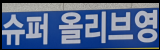

text : 슈퍼 올리브영, score : 0.9278951656960083


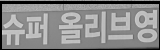

text : 슈퍼 올리브영, score : 0.9137559336061541


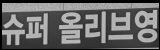

text : 슈퍼 올리브영, score : 0.8562544624129002


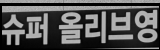

final result : 슈퍼 올리브영
---------- case #99 ----------
text : 전용주차장, score : 0.9995927930422304


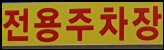

text : 전용주인장, score : 0.0708861927651331


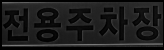

text : 전용주차장, score : 0.9997549744355841


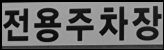

text : 전용주차장, score : 0.771988817932961


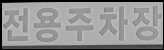

final result : 전용주차장
---------- case #100 ----------
text : 유임영어, score : 0.21006609283219085


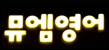

text : 유임영어, score : 0.08686840534210205


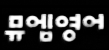

text : 유임영어, score : 0.21413224935531616


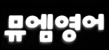

text : 유임영어, score : 0.12066756188869476


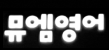

final result : 유임영어
---------- case #101 ----------
text : 신동백 스크린골프, score : 0.5500427437695554


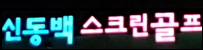

text : 신동백 스크런골프, score : 0.5535190385652807


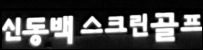

text : 신동백 스크린골프, score : 0.5559391888960316


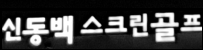

text : 신동백 스크런골프, score : 0.27532202116736854


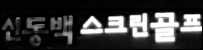

final result : 신동백 스크린골프
---------- case #102 ----------
text : 종합, score : 0.3699146295533475


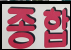

text : 종합, score : 0.9044477579475785


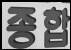

text : 종합, score : 0.981702811700195


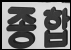

text : 종업, score : 0.1736074226499213


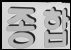

final result : 종합
---------- case #103 ----------
text : 전기, score : 0.9829620584362935


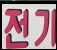

text : 전기, score : 0.9584518348723864


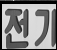

text : 전기, score : 0.9997485611613602


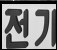

text : 신, score : 0.3019350403374119


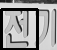

final result : 전기
---------- case #104 ----------
text : 선한, score : 0.9994573603110125


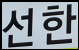

text : 선한, score : 0.9993615349586377


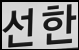

text : 선한, score : 0.9994680639255428


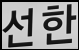

text : 선한, score : 0.9994466567300563


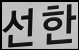

final result : 선한
---------- case #105 ----------
text : 약국, score : 0.9999383818635196


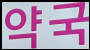

text : 약국, score : 0.9999513628832553


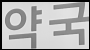

text : 약국, score : 0.745192941183561


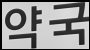

text : 인, score : 0.7921714850340891


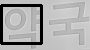

final result : 약국
---------- case #106 ----------
text : 주택청약, score : 0.9982748627662659


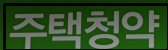

text : 주택청약, score : 0.9984138011932373


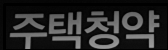

text : 주택청약, score : 0.9978635907173157


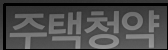

text : 주택청약, score : 0.9985718131065369


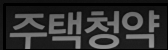

final result : 주택청약
---------- case #107 ----------
text : 종합저축, score : 0.9959044456481934


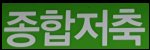

text : 종합저축, score : 0.9949876070022583


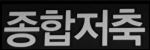

text : 종합저축, score : 0.994822084903717


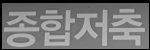

text : 종합저축, score : 0.9961827993392944


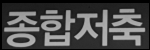

final result : 종합저축
---------- case #108 ----------
text : 박사이즈, score : 0.6427506804466248


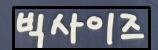

text : 박사이즈, score : 0.763424813747406


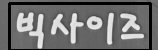

text : 박사이즈, score : 0.8890275955200195


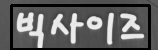

text : 박사이즈, score : 0.8894864916801453


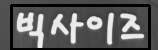

final result : 박사이즈
---------- case #109 ----------
text : 짚 시 풍, score : 0.42191597486066135


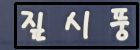

text : 짚 시 풍, score : 0.5240015384176712


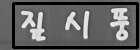

text : 짚 시 풍, score : 0.4283565515221168


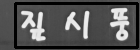

text : 짚 시 풍, score : 0.39986217841306193


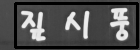

final result : 짚 시 풍
---------- case #110 ----------
text : 약서사리, score : 0.9939022064208984


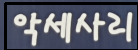

text : 약서사리, score : 0.9952670931816101


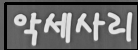

text : 약서사리, score : 0.9941005706787109


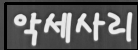

text : 약서사리, score : 0.9932406544685364


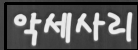

final result : 약서사리
---------- case #111 ----------
text : 외지, score : 0.9971947179367657


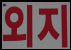

text : 외지, score : 0.967742124069583


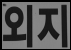

text : 외지, score : 0.9947016313499961


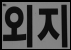

text : 의지, score : 0.8403325610748457


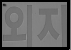

final result : 외지
---------- case #112 ----------
text : 위험 고양가스, score : 0.589033278232552


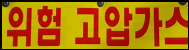

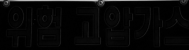

text : 위험 고양가스, score : 0.6378907630920475


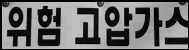

text : 위협 고입가스, score : 0.167117225361116


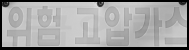

final result : 위험 고양가스
---------- case #113 ----------
text : 화 기 업 금, score : 0.5327858651606762


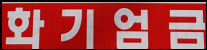

text : 화 기업 금, score : 0.8730393622148445


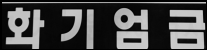

text : 화 기업 금, score : 0.6556048962277633


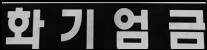

text : 인, score : 0.1528065037129842


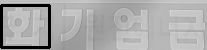

final result : 화 기업 금
---------- case #114 ----------


KeyboardInterrupt: ignored

In [ ]:
pred = []

for i, img_path in enumerate(tqdm(dataset.img_path)):
  print('-' * 10, f'case #{i}', '-' * 10)
  img = cv2.imread(img_path)
  img, horizontal = pre_processing(img)
  text = recognize(img, reader, blocklist, horizontal)
  text = post_processing(text)
  pred.append(text)

In [ ]:
submit = pd.read_csv('./sample_submission.csv')
submit['text'] = pred
submit.to_csv('./submit_8.csv', index=False, encoding="utf-8-sig")

In [ ]:
len(pred)

3669